## References

https://www.machinelearningplus.com/predictive-modeling/k-means-clustering/

https://www.askpython.com/python/examples/k-means-clustering-from-scratch

https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875

https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Infinites Gaussian Mixture Modeling

In [5]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.datasets import make_blobs
%matplotlib inline

### Synthesize the 2D data

In [7]:
D = 2 # dimensions
N = 500 # number of points to generate
K_true = np.random.randint(3,20) # randomly choice between 3-20
print("Number of cluster",K_true)
# Generate data
mu_scale = 4.0
covar_scale = 0.7
z_true = np.random.randint(0,K_true,N)
z_true

Number of cluster 3


array([2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [9]:
mu = np.random.randn(D,K_true)*mu_scale
mu

array([[-1.79308398, -3.68836667,  1.91092504],
       [ 4.13992652,  7.42210367,  2.12358965]])

In [15]:
X = mu[:,z_true] + np.random.randn(D,N) * covar_scale
print(X.shape)
X= X.T
X

(2, 500)


array([[ 9.16238570e-01,  3.10728000e+00],
       [ 1.70764554e+00,  3.11204089e+00],
       [-1.96804470e+00,  4.48086639e+00],
       [ 2.73325796e+00,  2.20123380e+00],
       [-1.45511243e+00,  3.58637258e+00],
       [-1.68832213e+00,  3.16281084e+00],
       [-2.79422824e+00,  9.41070826e+00],
       [-1.30946922e+00,  5.46127377e+00],
       [-2.22058762e+00,  3.49978539e+00],
       [-3.26855960e+00,  7.03806629e+00],
       [-2.19229005e+00,  3.56064897e+00],
       [-3.58890466e+00,  8.42249454e+00],
       [ 2.79596198e-01,  4.06457256e+00],
       [-3.66595841e+00,  6.63069397e+00],
       [ 2.96683946e+00,  1.24284366e+00],
       [-1.51790598e+00,  4.22841117e+00],
       [-1.80767997e+00,  3.65530493e+00],
       [ 3.16239397e+00,  2.04039984e+00],
       [-1.21513191e+00,  3.84807358e+00],
       [ 2.41832418e+00,  1.64479097e+00],
       [-1.84258610e+00,  3.01416612e+00],
       [ 1.14330706e+00,  1.67569554e+00],
       [-1.36378038e+00,  4.65623963e+00],
       [-3.

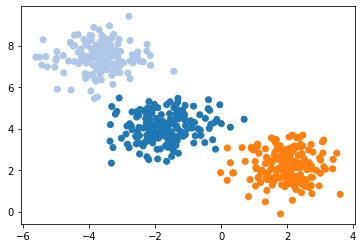

In [17]:
plt.scatter(X[:,0],X[:,1],c = plt.cm.tab20(z_true))

### BayesianGaussianMixture

In [18]:
bgmm = BayesianGaussianMixture(n_components = 100,weight_concentration_prior = None) # auto find the cluster number
y_pred = bgmm.fit_predict(X)
print("Estimated Clusters ",len(set(y_pred)),set(y_pred))

Estimated Clusters  3 {0, 2, 4}


### Generate datas from the model

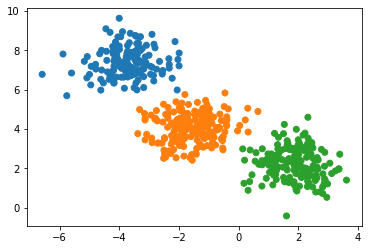

In [19]:
rand_data,rand_y = bgmm.sample(N)
plt.scatter(rand_data[:,0],rand_data[:,1],c = plt.cm.tab20(bgmm.predict(rand_data)))

## Kmeans

**Step1:** Randomly pick k data points as our initial Centroids

**Step2:** Find the distance (Euclidean distance for our purpose) between each data points in our training set with k centroids

**Step3:** Now assign each data point to closest centroid according to the distance found

**Step4:** Update centroid location by taking the average of the points in each cluster group

**Step5:** Repeat the Steps 2 to 4 till our centroids don't change

In [38]:
from sklearn.datasets import make_blobs

In [51]:
# Generate dataset
n_samples = 200 # number of sample
centers = 7 # number of class
X,y = make_blobs(n_samples = n_samples,centers = centers, n_features = 2, random_state = 0)
print(f"Number of samples: {n_samples}")
print(f"Number of class: {centers}")
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

Number of samples: 200
Number of class: 7
X.shape: (200, 2)
y.shape: (200,)


In [52]:
X[:10]

array([[ 0.58894326,  4.00148458],
       [ 8.87380618, -1.96111374],
       [ 5.14666315, -0.63617901],
       [ 8.67694117, -2.38373692],
       [-2.43972624,  4.03489855],
       [ 8.62084663, -2.722123  ],
       [-2.29682009,  3.45713145],
       [ 1.19404184,  2.80772861],
       [ 1.15369622,  3.90200639],
       [-2.75233953,  3.76224524]])

In [53]:
y

array([0, 4, 5, 4, 2, 4, 2, 1, 0, 2, 0, 3, 0, 3, 5, 3, 5, 2, 1, 5, 1, 1,
       6, 3, 2, 0, 6, 6, 0, 6, 1, 5, 3, 3, 6, 6, 0, 0, 4, 1, 2, 1, 1, 3,
       5, 1, 1, 3, 0, 4, 0, 0, 2, 6, 5, 6, 4, 5, 4, 5, 2, 1, 5, 1, 4, 4,
       3, 3, 1, 0, 4, 6, 0, 2, 2, 6, 2, 6, 2, 5, 1, 0, 6, 5, 4, 6, 1, 4,
       4, 6, 1, 2, 2, 5, 5, 0, 0, 3, 4, 4, 6, 4, 5, 1, 0, 6, 2, 4, 6, 0,
       3, 0, 3, 6, 1, 2, 6, 5, 6, 3, 5, 1, 2, 1, 1, 6, 1, 3, 2, 0, 3, 1,
       5, 3, 0, 0, 3, 3, 0, 5, 2, 4, 2, 0, 4, 5, 6, 6, 1, 4, 2, 3, 5, 2,
       2, 4, 2, 0, 6, 2, 4, 6, 5, 6, 6, 0, 4, 2, 1, 6, 5, 5, 3, 5, 2, 3,
       4, 4, 2, 1, 3, 3, 3, 2, 1, 4, 4, 5, 5, 1, 1, 3, 0, 3, 3, 0, 3, 0,
       4, 5])

Text(0.5, 1.0, 'Visualize model')

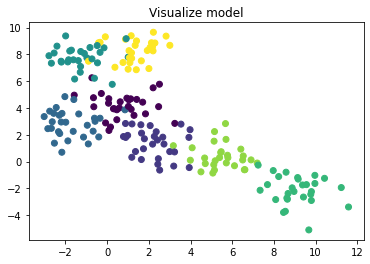

In [54]:
plt.scatter(X[:,0],X[:,1],c= y.ravel())
plt.title("Visualize model")

In [56]:
# Choice random centroid number
k = 4
# Choice iterations step 
no_of_iterations = 100

In [64]:
# Choice randomly centroid (Step1)
idx = np.random.choice(len(X),k ,replace = False)
print(f"idx: {idx}")
centroids = X[idx,:]
print(f"centroids:\n {centroids}")

idx: [  6   1 150 174]
centroids:
 [[-2.29682009  3.45713145]
 [ 8.87380618 -1.96111374]
 [-2.17052242  0.69447911]
 [-1.36023052  3.5529137 ]]


In [66]:
# import calculate distance function
from scipy.spatial.distance import cdist

In [73]:
# find the distance between centroids and all the data points (Step2)
distances = cdist(X,centroids,'euclidean')
print(f"distances.shape: {distances.shape}")
print(distances[:10])

distances.shape: (200, 4)
[[ 2.93665633 10.20742535  4.30707975  2.00012356]
 [12.41532409  0.         11.35910945 11.62497336]
 [ 8.49474151  3.95563487  7.43719407  7.73874427]
 [12.43137883  0.46622547 11.27576517 11.66141656]
 [ 0.59517811 12.80422505  3.35124943  1.18220997]
 [12.54506405  0.80194989 11.31931163 11.78974073]
 [ 0.         12.41532409  2.76553775  0.94147451]
 [ 3.55075218  9.03994678  3.97317456  2.66075329]
 [ 3.47907696  9.69413614  4.61937883  2.53804912]
 [ 0.54826306 12.95855324  3.12245099  1.40775964]]


In [77]:
# Centroid with minimum distance (Step3)
for i in distances:
    points = np.array([np.argmin(i) for i in distances])
    
print(f"len points: {len(points)}")
print(points[:10])

len points: 200
[3 1 1 1 0 1 0 3 3 0]


In [97]:
centroids = []
for i in range(k):
    #temp_cent = X[points == i] # find all input in X have closest label equal to each point
    temp_cent = X[points == i].mean(axis = 0) # find the mean of the bunch of points
    centroids.append(temp_cent) # append the centroid of the
# Update and reshape the centroids
print(f"centroids \n: {centroids}")
centroids  = np.vstack(centroids)
print(centroids)
# Calculate the distance
distances = cdist(X,centroids,'euclidean')
points = np.array([np.argmin(i) for i in distances])

centroids 
: [array([-2.47760658,  4.26244693]), array([ 7.30814354, -0.90804649]), array([0.78048885, 0.62143396]), array([0.62034376, 5.50228427])]
[[-2.47760658  4.26244693]
 [ 7.30814354 -0.90804649]
 [ 0.78048885  0.62143396]
 [ 0.62034376  5.50228427]]


In [98]:
# Repeating the above steps for defined number of iterations
for _ in range(no_of_iterations): # Lopp over the iterations
    centroids = []
    for i in range(k): # loop over each label 0 -> 1 -> 2 -> ...
        temp_cent = X[points == i]
        centroid_i = temp_cent.mean(axis = 0)
        centroids.append(centroid_i)
    # Reshape and 
    centroids = np.vstack(centroids) # Updated Centroids
    distances = cdist(X,centroids,'euclidean')
    # Find the closest centroids of each label again
    points  = np.array([ np.argmin(i) for i in distances])    

In [102]:
# predicted labels
points

array([0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 1, 0, 2, 2, 2, 2,
       3, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 3, 3, 3, 0, 0, 1, 0, 0, 2, 0, 3,
       2, 2, 0, 3, 0, 1, 0, 0, 0, 3, 2, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 1,
       3, 3, 2, 0, 1, 3, 0, 0, 0, 3, 0, 3, 0, 2, 2, 0, 3, 2, 1, 3, 2, 1,
       1, 3, 0, 0, 0, 2, 2, 0, 0, 3, 1, 1, 3, 1, 2, 2, 0, 3, 0, 1, 3, 0,
       3, 0, 3, 3, 2, 0, 3, 2, 3, 3, 2, 2, 0, 2, 2, 3, 2, 3, 0, 3, 3, 2,
       1, 3, 0, 3, 3, 3, 0, 2, 0, 1, 0, 0, 1, 2, 3, 3, 0, 1, 0, 3, 2, 0,
       0, 1, 0, 0, 3, 0, 1, 3, 2, 3, 3, 2, 1, 0, 2, 3, 2, 2, 3, 2, 0, 3,
       1, 1, 0, 2, 3, 3, 3, 0, 0, 1, 1, 1, 2, 2, 2, 3, 0, 3, 3, 0, 3, 0,
       1, 2], dtype=int64)

In [119]:
centroids

array([[-0.41922481,  3.26139457],
       [ 8.81389767, -1.90504522],
       [ 4.00530995,  0.77421584],
       [ 0.079457  ,  7.89950683]])

Text(0.5, 1.0, 'grouth truth')

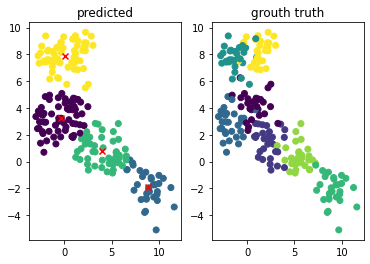

In [122]:
# Visualize
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = points)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',color = 'r')
plt.title("predicted")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c = y)
plt.title("grouth truth")

In [166]:
def kmeans(x,k,no_iterations):
    '''
    Cluster x data points by Kmean algorithm
    
    Arguments:
        x --- array of features
        k --- int number of centroids (also know labels)
        no_iterations --- number of iterations
    
    Returns:
        centroids --- centroids of cluster
        points --- predicted labels
    '''
    idx = np.random.choice(len(x),k,replace = False)
    # Randomly choosing centroids
    centroids = x[idx,] 
    # find the distance between centroids and all the data points
    distances = cdist(x,centroids,'euclidean')
    # centroid with the minimum distance
    points = np.array([np.argmin(d) for d in distances])
    #print(points)
    # loop over
    for _ in range(no_iterations):
        centroids = []
        for i in range(k):
            temp_cent = x[points == i].mean(axis = 0)
            centroids.append(temp_cent)
        # Update the centroids
        centroids = np.vstack(centroids)
        # Calucate the distance 
        distances = cdist(x,centroids,'euclidean')
        # Find predicted label point
        points = np.array([ np.argmin(d) for d in distances])
    
    return centroids,points

Text(0.5, 1.0, 'grouth truth')

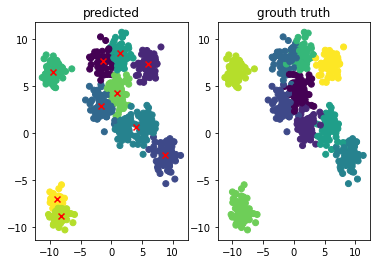

In [129]:
# Generate dataset
n_samples = 600 # number of sample
centers = 10 # number of class
k = 10 # number of all predicted unique labels
no_iterations = 10
X,y = make_blobs(n_samples = n_samples,centers = centers, n_features = 2, random_state = 0)
centroids,points = kmeans(X,k,no_iterations)
# Visualize
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = points)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',color = 'r')
plt.title("predicted")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c = y)
plt.title("grouth truth")

In [152]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [153]:
# Load Data
data = load_digits().data
print(data.shape)
data

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [154]:
pca = PCA(2)
pca

PCA(n_components=2)

In [155]:
# Transform the data
df = pca.fit_transform(data)
print(df.shape)
df

(1797, 2)


array([[ -1.25947267,  21.27488898],
       [  7.95760174, -20.76868529],
       [  6.99193689,  -9.95600227],
       ...,
       [ 10.80128847,  -6.96026386],
       [ -4.87210015,  12.42396705],
       [ -0.34437743,   6.36552906]])

In [167]:
# Applying our function
centroids , label = kmeans(df,10,1000)

Text(0.5, 1.0, 'results')

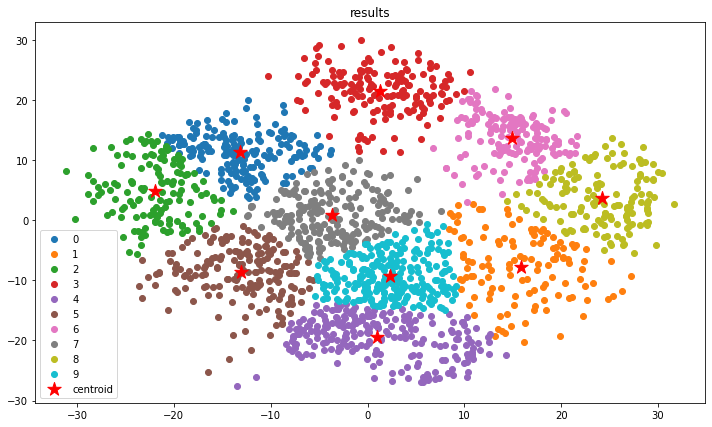

In [180]:
# Visualize the result
plt.figure(figsize = (12,7))
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i,0],df[label == i,1],label = i)
plt.scatter(centroids[:,0],centroids[:,1],label = 'centroid',marker = '*',color = 'red',s= 200)
plt.legend()
plt.title("results")

Model Kmeans functionality

- Train model

- Return centroids, predicted labels

- Predict new features

## Kmeans clustering

![step1](./step1.png)
![step2](./step2.png)
![step3](./step3.png)
![step4](./step4.png)
![step5](./step5.png)

**Euclid distance**: 

$$ d_(p,q) = \sqrt{(q_1 - p_1)^2 - (q_2 - p_2)^2}$$

**Lost function (cost function)**:

$$ J = \sum_{i=1}^{m} \sum_{k=1}^{n} w_{ik} ||x_{i} - c_{k}||^2 $$

- $w_{ik} = 0$    if the data point does not belong to the cluster

- $w_{ik} = 1$    if the data point does belong to the cluster

- $m$ the number of datapoint

- $n$ the number of cluster

There are 2 way to minimize:

- 1/ Minimize $J$ by treating $c_k$ fixed and $w_{ik}$ variable: $\frac{dJ}{d{w_{ik}}} = \sum_{i=1}^{m} \sum_{k=1}^{n} ||x_{i}  c_{k}||^2$

    reducing this you will get: $
                                  \begin{cases}
                                    1 & \text{if $k = argmin ||x_{i} - c_{k}||^2$} \\
                                    0 & \text{otherwise}
                                  \end{cases}
                                $
                                
- 2/ Minimize $J$ by treating $w_{ik}$ constant and $c_{k}$ variable: $\frac{dJ}{d{c_{k}}} = 2 \sum_{k=1}^{n} w_{ik}||x_{i} - c_{k}||^2$

    reducing this you will get: $ c_{k} = \frac{\sum_{i=1}^{m} w_{ik}x_{i}}{\sum_{i=1}^{m} w_{ik}}$

In [1]:
# import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Gaussian make blobs')

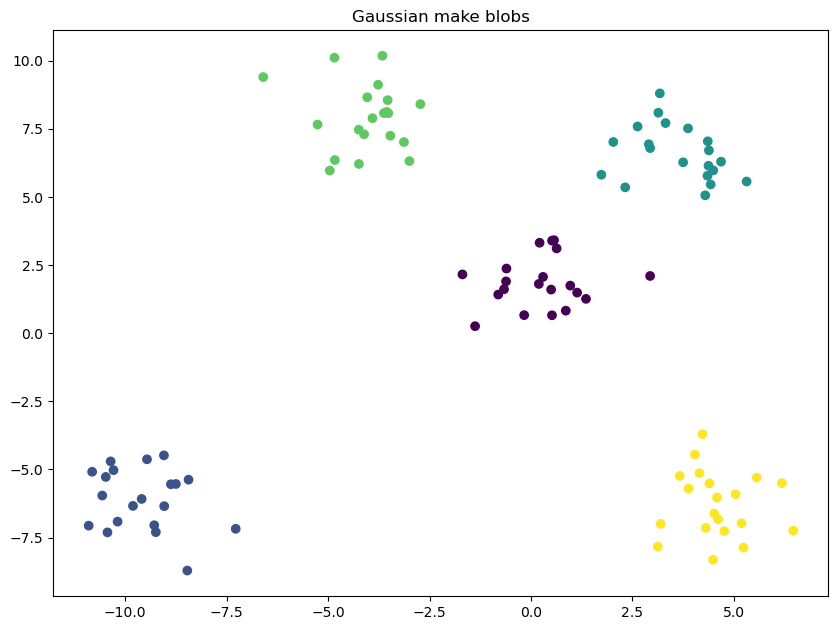

In [7]:
# Make dataset
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples =100,centers =5,random_state = 101)
plt.rcParams.update({'figure.figsize':(10,7.5),'figure.dpi':100})
plt.scatter(X[:,0],X[:,1],c= y)
plt.title("Gaussian make blobs")

In [8]:
y

array([3, 1, 4, 3, 0, 0, 2, 4, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 4, 0, 4, 3,
       4, 0, 0, 3, 1, 3, 4, 0, 1, 2, 4, 1, 1, 4, 3, 3, 1, 0, 2, 4, 0, 0,
       2, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 3, 0, 2, 4, 4, 1, 3, 2, 2, 4, 0,
       3, 4, 1, 3, 4, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 4, 2, 4, 3, 2, 2, 0,
       1, 2, 4, 0, 3, 2, 1, 4, 3, 2, 2, 0])

In [9]:
from sklearn.cluster import KMeans

In [10]:
cluster = KMeans(n_clusters = 5)
cluster.fit(X)
y_pred = cluster.predict(X)
y_pred

array([0, 2, 1, 0, 4, 4, 3, 1, 2, 2, 4, 2, 2, 4, 4, 4, 3, 4, 1, 4, 1, 0,
       1, 4, 4, 0, 2, 0, 1, 4, 2, 3, 1, 2, 2, 1, 0, 0, 2, 4, 3, 1, 4, 4,
       3, 1, 0, 2, 2, 2, 0, 0, 3, 1, 2, 0, 4, 3, 1, 1, 2, 0, 3, 3, 1, 4,
       0, 1, 2, 0, 1, 0, 3, 0, 3, 4, 3, 0, 2, 3, 2, 1, 3, 1, 0, 3, 3, 4,
       2, 3, 1, 4, 0, 3, 2, 1, 0, 3, 3, 4])

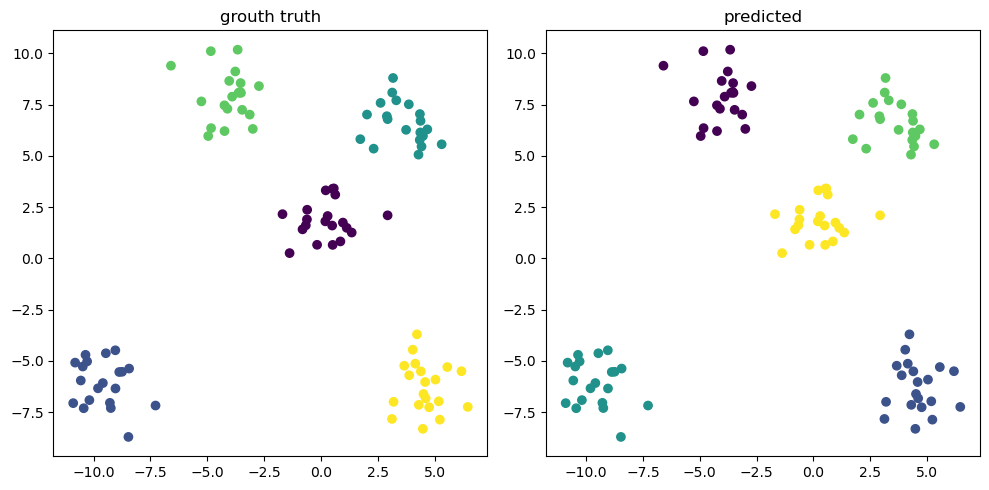

In [16]:
plt.rcParams.update({'figure.figsize':(10,5),'figure.dpi':100})
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = y)
plt.title("grouth truth")
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c = y_pred)
plt.title("predicted")
plt.tight_layout()

In [18]:
# setting the number of training examples
m = X.shape[0]
n = X.shape[1]
n_iter = 50
K = 5
print(f"number of samples: {m}")
print(f"dimensions: {n}")
print(f"iterations: {n_iter}")
print(f"centroids number: {K}")

number of samples: 100
dimensions: 2
iterations: 50
centroids number: 5


In [20]:
import random

# creating an empty centroid array
centroids = np.array([]).reshape(n,0)
centroids

array([], shape=(2, 0), dtype=float64)

In [21]:
# creating 5 random centroids
for k in range(K):
    centroids = np.c_[centroids,X[random.randint(0,m-1)]]
    
centroids

array([[ 6.46042142, -6.5976702 ,  5.3123195 ,  0.51666786,  0.49487719],
       [-7.2475793 ,  9.3948237 ,  5.56222729,  0.65447968,  1.5978536 ]])

In [24]:
X[:10,]

array([[ -4.95836863,   5.96425277],
       [-10.56433263,  -5.95908897],
       [  5.03973453,  -5.91474793],
       [ -4.24393374,   7.46294311],
       [  0.29639341,   2.06317757],
       [ -1.37811338,   0.25423232],
       [  3.74699958,   6.26688185],
       [  4.60888633,  -6.82802632],
       [ -9.2834887 ,  -7.04901491],
       [ -9.04448516,  -4.48554835]])

In [28]:
(X - centroids[:,0])[:10,]

array([[-11.41879005,  13.21183207],
       [-17.02475405,   1.28849033],
       [ -1.42068689,   1.33283137],
       [-10.70435516,  14.71052241],
       [ -6.16402801,   9.31075687],
       [ -7.8385348 ,   7.50181162],
       [ -2.71342184,  13.51446115],
       [ -1.85153509,   0.41955298],
       [-15.74391012,   0.19856439],
       [-15.50490658,   2.76203096]])

In [29]:
# find the euclidean distance 
outputs = {}

# creating an empty array
euclid = np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
    dist = np.sum((X - centroids[:,k])**2,axis = 1)
    euclid = np.c_[euclid,dist]
    
euclid

array([[3.04941273e+02, 1.44561266e+01, 1.05648659e+02, 5.81697149e+01,
        4.88033317e+01],
       [2.91502458e+02, 2.51477045e+02, 3.84808811e+02, 1.66527862e+02,
        1.79413503e+02],
       [3.79479072e+00, 3.69812172e+02, 1.31795263e+02, 6.36128834e+01,
        7.70949099e+01],
       [3.30982689e+02, 9.27223797e+00, 9.49346965e+01, 6.90185019e+01,
        5.68556040e+01],
       [1.24685435e+02, 1.01281148e+02, 3.74028634e+01, 2.03295058e+00,
        2.55922212e-01],
       [1.17719805e+02, 1.10794184e+02, 7.29367025e+01, 3.75039390e+00,
        5.31341179e+00],
       [1.90003318e+02, 1.16796213e+02, 2.94676450e+00, 4.19341011e+01,
        3.23761248e+01],
       [3.60420691e+00, 3.88767772e+02, 1.54013203e+02, 7.27341480e+01,
        8.79205236e+01],
       [2.47910134e+02, 2.77613450e+02, 3.72081047e+02, 1.55386898e+02,
        1.70384775e+02],
       [2.48030943e+02, 1.98651632e+02, 3.07075635e+02, 1.17835535e+02,
        1.28007213e+02],
       [1.04633735e+02, 1.2234

In [41]:
# storing the mininum value we have computed
minimum = np.argmin(euclid,axis = 1)+1
minimum

array([2, 4, 1, 2, 5, 4, 3, 1, 4, 4, 5, 4, 4, 5, 4, 5, 3, 5, 1, 5, 1, 2,
       1, 5, 5, 2, 4, 2, 1, 4, 4, 3, 1, 4, 4, 1, 2, 2, 4, 5, 3, 1, 5, 4,
       3, 1, 2, 4, 4, 4, 2, 2, 3, 1, 4, 2, 5, 3, 1, 1, 4, 2, 3, 3, 1, 5,
       2, 1, 4, 2, 1, 2, 3, 2, 3, 5, 3, 2, 4, 3, 4, 1, 3, 1, 2, 3, 3, 5,
       4, 3, 1, 5, 2, 3, 4, 1, 2, 3, 3, 5], dtype=int64)

In [42]:
# computing the mean of separated clusters
cent = {}
for k in range(K):
    cent[k+1] = np.array([]).reshape(2,0)
    
cent

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64),
 5: array([], shape=(2, 0), dtype=float64)}

In [43]:
# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [45]:
# repeating the above steps again and again
for i in range(n_iter):
    euclid =  np.array([]).reshape(m,0)
    for k in range(K):
        dist = np.sum((X - centroids[:,k])**2,axis = 1)
        euclid = np.c_[euclid,dist]
    C = np.argmin(euclid,axis = 1)+1
    cent = {}
    for k in range(K):
        cent[k+1] = np.array([]).reshape(2,0)
    for k in range(m):
        cent[C[k]] = np.c_[cent[C[k]],X[k]]
    for k in range(K):
        cent[k+1] = cent[k+1].T
    for k in range(K):
        centroids[:,k] = np.mean(cent[k+1],axis = 0)
    final = cent

In [46]:
final

{1: array([[ 5.03973453, -5.91474793],
        [ 4.60888633, -6.82802632],
        [ 6.18289166, -5.50567419],
        [ 4.3964456 , -5.51281249],
        [ 4.15136702, -5.1385105 ],
        [ 4.76174286, -7.26426981],
        [ 3.12439493, -7.83414491],
        [ 3.66494716, -5.23892175],
        [ 4.48453869, -8.31633401],
        [ 3.19526297, -6.99964888],
        [ 4.22508494, -3.70723073],
        [ 6.46042142, -7.2475793 ],
        [ 5.18499867, -6.97326156],
        [ 4.58453807, -6.03358267],
        [ 5.23300661, -7.8687577 ],
        [ 4.03978827, -4.45774397],
        [ 4.30549643, -7.14680904],
        [ 3.88361735, -5.70449396],
        [ 4.51240059, -6.61641203],
        [ 5.56089529, -5.3034246 ]]),
 2: array([[-4.95836863,  5.96425277],
        [-4.24393374,  7.46294311],
        [-3.62367998,  8.07304206],
        [-4.11257256,  7.29414134],
        [-3.5550441 ,  8.11543921],
        [-4.24077911,  6.20620242],
        [-3.66315162, 10.17524886],
        [-6.5976702 

Text(0.5, 1.0, 'Original Dataset')

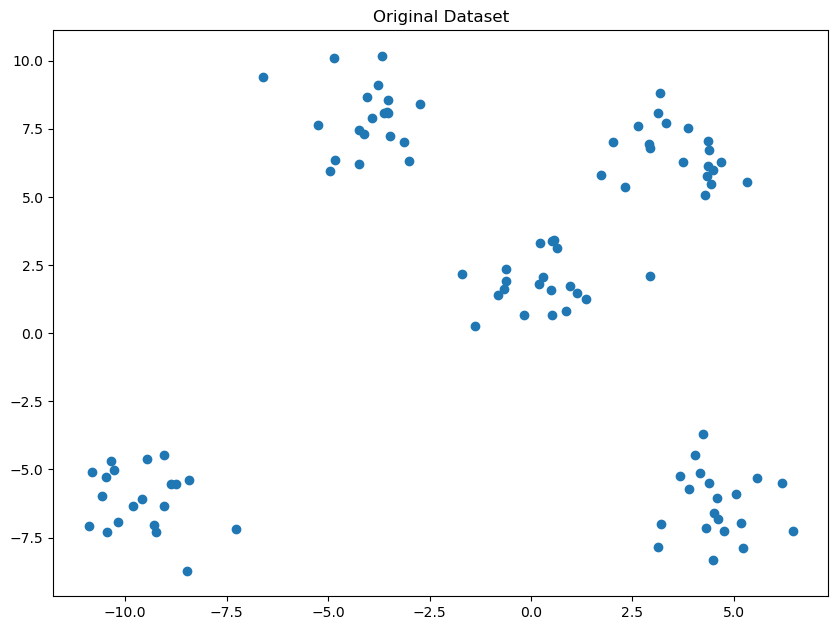

In [49]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

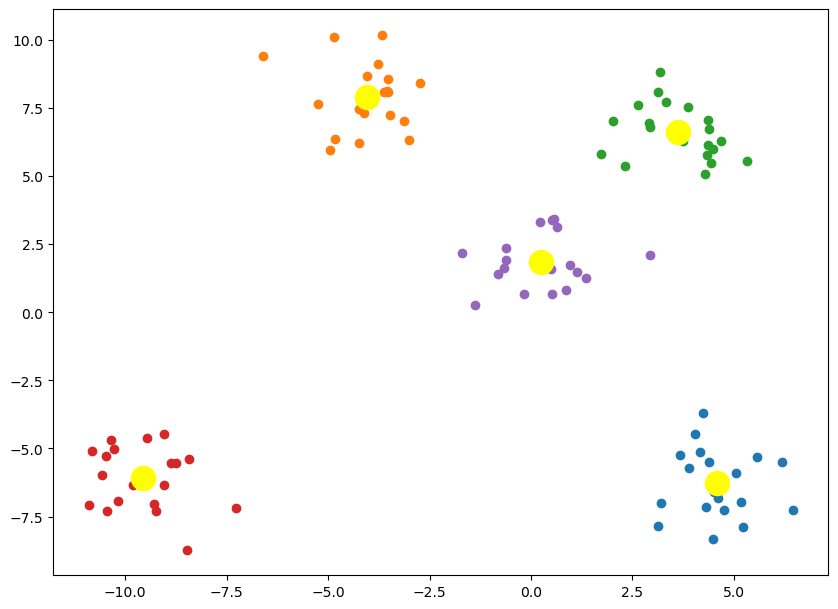

In [50]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])

plt.scatter(centroids[0,:],centroids[1,:],s= 300,c= 'yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


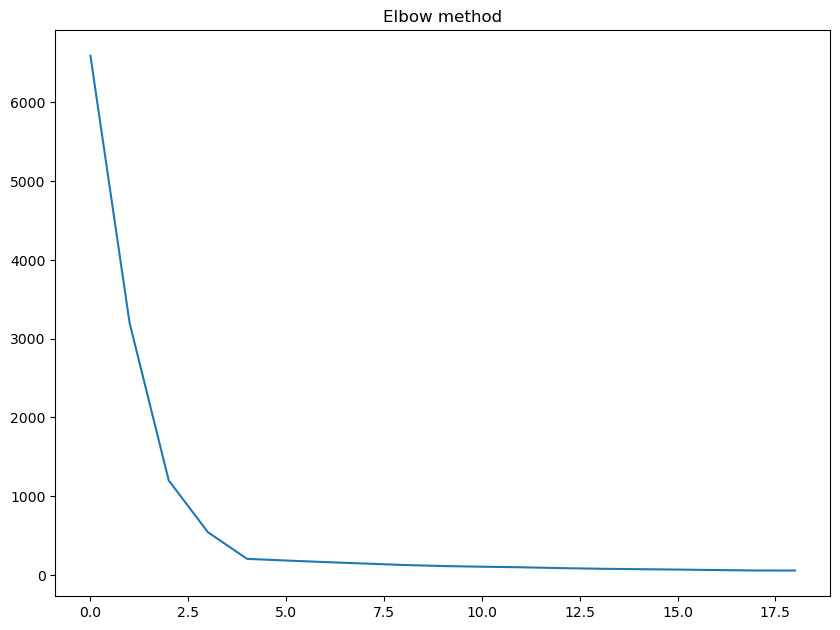

In [52]:
elbow = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
    
plt.plot(elbow)
plt.rcParams.update({'figure.figsize':(10,7.5),'figure.dpi':100})
plt.title('Elbow method')
plt.show()

In [54]:
df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
# let try to find certain clusters between the customers based on their Age and Spending Score
X = df.iloc[:,[2,4]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [56]:
from sklearn.cluster import KMeans
elbow = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


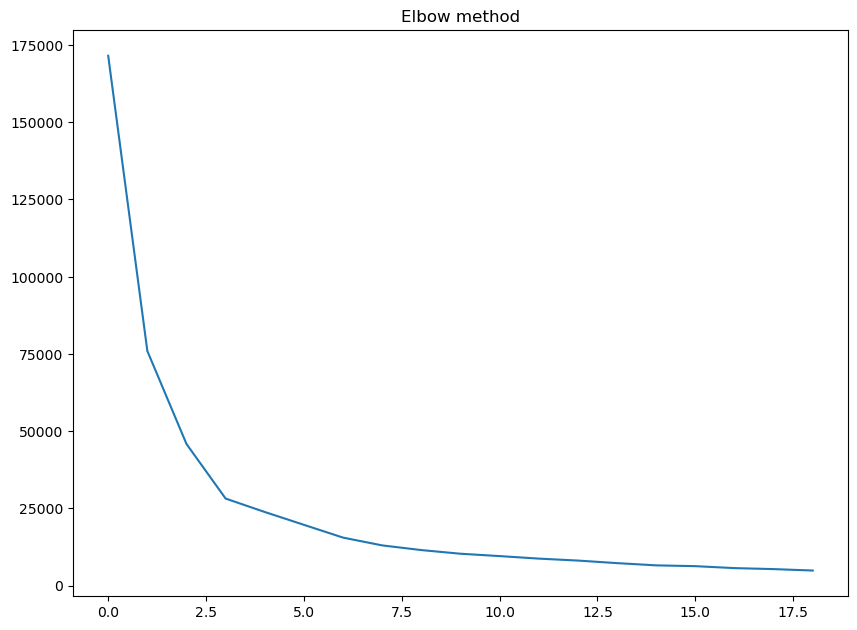

In [57]:
plt.plot(elbow)
plt.rcParams.update({'figure.figsize':(10,7.5),'figure.dpi':100})
plt.title('Elbow method')
plt.show()

As you can see from the above-elbow plot that the graph starts to flatten after reaching 5 number of clusters. So let’s use 5 as the number of clusters.

In [58]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 101)
y_pred =kmeans.fit_predict(X)
y_pred

array([0, 4, 3, 4, 0, 4, 3, 4, 2, 4, 2, 4, 2, 4, 3, 4, 0, 0, 2, 4, 0, 4,
       2, 4, 2, 4, 2, 0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 1, 4, 1, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 4, 3, 4, 1, 4, 2, 4, 2, 4,
       0, 4, 3, 4, 2, 4, 3, 4, 2, 4, 0, 4, 3, 4, 1, 4, 3, 4, 2, 4, 2, 4,
       2, 4, 3, 4, 3, 4, 1, 4, 3, 4, 2, 4, 2, 4, 3, 0, 3, 4, 3, 4, 2, 4,
       2, 4, 2, 4, 3, 4, 2, 4, 1, 4, 2, 4, 3, 4, 3, 4, 3, 4, 2, 4, 2, 4,
       3, 4])

In [64]:
kmeans.cluster_centers_

array([[27.42222222, 49.82222222],
       [55.40816327, 48.04081633],
       [51.17857143, 15.53571429],
       [31.80952381, 15.        ],
       [30.1754386 , 82.35087719]])

No handles with labels found to put in legend.


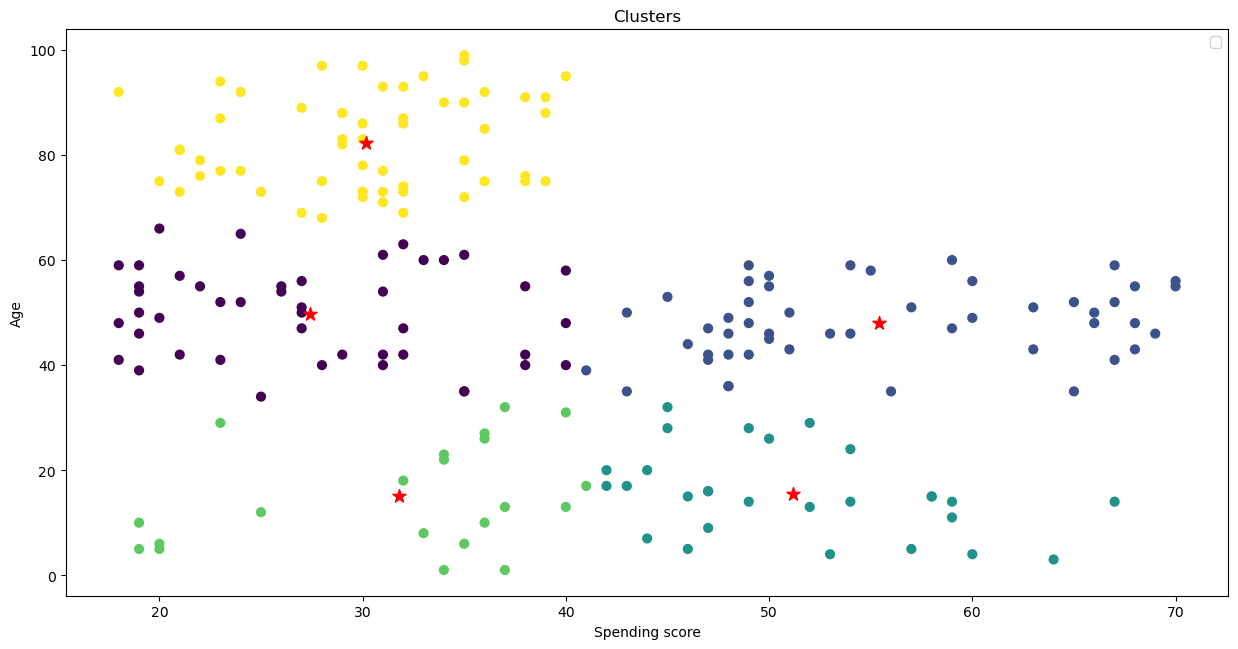

In [66]:
plt.figure(figsize = (15,7.5))
# for i in range(5):
#     plt.scatter(X[y_pred == i,0],X[y_pred == i,1],s = 50)

plt.scatter(X[:,0],X[:,1],s = 40,c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s= 100,marker = '*',color = 'r')
plt.title("Clusters")
plt.xlabel("Spending score")
plt.ylabel("Age")
plt.legend()
plt.show()

## Kmeans images

### partitional clustering
![patitional_clustering](partitional_clustering.png)

|Advantages of K-means|Disadvantages of K-means|
---|---
|Easy to Implement|Difficult to predict the number of clusters (K-Value)|
|k-Means may be faster than hierarchical clustering with a large number of variables (if K is small)|Initial seeds have a strong impact on the final results|
|k-Means may produce tighter clusters than hierarchical clustering|The order of the data has an impact on the final results|
|An instance can change cluster (move to another cluster) when the centroids are recomputed|Sensitive to scale: rescaling your datasets (normalization or standardization) will
completely change results.|

### hierachical clustering
![hierachical_clustering](hierachical_clustering.png)

|Advantages of hierarchical clustering|Disadvantages of hierarchical clustering|
---|---
|Outputs a hierarchy that is more informative than the unstructured set of clusters returned by k-means.|Once a point has been assigned to a
cluster, it can no longer be moved around.|
|Easy to implement|Time complexity: not suitable for large datasets|
||Initial seeds have a strong impact on the final results|
||The order of the data has an impact on the final results|

## How to write K-means from Scratch in Python?

Our k-means implementation will be divided into five helper methods and one main loop that runs the algorithm. Let’ go through the functions one-by-one.

- Pairwise Distance
- Initialize Centers
- Update Assignment
- Update Centers
- Calculate Loss
- Main Loop
- The Complete Implementation

In [192]:
X1 = X[:40]
X2 = X[40:]
print(X1.shape)
print(X2.shape)

(40, 2)
(60, 2)


In [194]:
X1_sumsquare = np.sum(np.square(X1),axis =1)
X1_sumsquare

array([ 60.1577306 , 147.11586529,  60.38316716,  73.70649343,
         4.34455074,   1.96383055,  53.31381394,  67.86377661,
       135.87177369, 101.92285574,   3.4988872 , 100.11450296,
       147.60260548,   7.49421085,   0.46325826,   3.97266622,
        36.77138996,  10.05161725,  68.54059756,   3.98155528,
        49.71983547,  78.30506472,  43.6381383 ,   2.65254966,
         3.03519907,  70.11775086, 109.45220395,  78.49869205,
        75.44381089,   1.41363724, 142.80868401,  87.43208393,
        71.13567019, 162.35981937, 151.58220678,  40.87813875,
        56.50115587, 116.95436914, 131.07238643,  11.03453644])

In [199]:
X1_sumsquare[:,np.newaxis]

array([[ 60.1577306 ],
       [147.11586529],
       [ 60.38316716],
       [ 73.70649343],
       [  4.34455074],
       [  1.96383055],
       [ 53.31381394],
       [ 67.86377661],
       [135.87177369],
       [101.92285574],
       [  3.4988872 ],
       [100.11450296],
       [147.60260548],
       [  7.49421085],
       [  0.46325826],
       [  3.97266622],
       [ 36.77138996],
       [ 10.05161725],
       [ 68.54059756],
       [  3.98155528],
       [ 49.71983547],
       [ 78.30506472],
       [ 43.6381383 ],
       [  2.65254966],
       [  3.03519907],
       [ 70.11775086],
       [109.45220395],
       [ 78.49869205],
       [ 75.44381089],
       [  1.41363724],
       [142.80868401],
       [ 87.43208393],
       [ 71.13567019],
       [162.35981937],
       [151.58220678],
       [ 40.87813875],
       [ 56.50115587],
       [116.95436914],
       [131.07238643],
       [ 11.03453644]])

In [195]:
X2_sumsquare = np.sum(np.square(X2),axis =1)
X2_sumsquare

array([ 56.46064028,  89.27249872,   3.41262896,   0.69528933,
        53.2766536 ,  59.20478987, 131.79196453, 138.76549758,
       107.18040464, 110.95682802,  48.81196476,  78.00391176,
        33.98721637,  31.59490241, 129.40785888,  77.42780607,
         3.29128144,  64.35246177,  94.26445066,  75.51058798,
       121.98399722,  58.9357121 ,  49.34781819,  61.47449665,
        57.42210917,   2.79803955,  97.23876928,  89.30170582,
       104.48525733,  77.47153646,  36.19137054,  91.14311191,
        75.21218713, 125.54613811,  55.77858956,   5.97570293,
        64.15553321,  85.52777446, 136.36376247,  70.3711219 ,
       168.66237094,  69.61417901,  59.15911079,  47.62373506,
        63.67047757,  52.22506089,  56.80909907,  11.94859609,
       137.61835319,  43.99368219,  64.13866729,  13.00482742,
        64.4645937 ,  71.37078926, 129.03872532,  59.04986894,
        86.224373  ,  54.69216801,  68.48095104,  11.77552296])

In [201]:
(X1_sumsquare[:,np.newaxis] + X2_sumsquare).shape

(40, 60)

In [198]:
mul =np.dot(X1,X2.T) # x11x21 + x12x22
print(mul.shape)
mul

(40, 60)


array([[  26.95745772,  -71.83671417,    0.78218108, ...,   25.93892106,
          20.3775725 ,   17.65915847],
       [ -71.9512846 ,    2.18161582,  -21.79275692, ...,  -71.45074826,
         -87.93774673,  -25.69430553],
       [ -26.37828225,   71.78990387,   -0.60979977, ...,  -25.36411693,
         -19.67488991,  -17.4490227 ],
       ...,
       [  59.9031948 , -101.04831337,    7.8280343 , ...,   58.32534868,
          55.65010245,   32.61523213],
       [ -64.6862707 ,   -4.31566608,  -20.24483407, ...,  -64.30972197,
         -80.16949924,  -22.38997412],
       [  23.59127754,  -26.62240206,    4.45222747, ...,   23.12402093,
          24.24770615,   11.35476608]])

In [202]:
# calculate pairwise distance
def pairwise_dist(self,x1,x2):
    '''
    Arguments:
        x1 --- (NxD) numpy array have D dimensions
        x2 --- (MxD) numpy array have D dimensions
    Return:
        dist --- (NxM) array, where dist2[i:j] is the euclidean distance between x[i,:] and y[j,:]
    '''
    x1_sum_square = np.sum(np.square(x1),axis = 1)
    x2_sum_square = np.sum(np.square(x2),axis = 1)
    mul = np.dot(x1,x2.T)
    dists = np.sqrt(abs(x1_sum_square[:,np.newaxis] + x2_sum_square - 2 * mul))
    return dists

In [204]:
# This function take in the array of points and choses K of them at random to be the initial centroids, The function simply returns the K selected points

def _init_centers(self,points,K,**kwargs):
    '''
    Arguments:
        points --- (NxD) numpy array, where N is number of points and D is dimensionality
        K --- number of clusters
        kwargs --- any additional arguments you want
    Return:
        centers: K x D numpy array, the centers.
    '''
    N,D= points.shape
    centers = np.empty([K,D])
    for number in range(K):
        rand_index = np.random.randint(N)
        centers[number] = points[rand_index] # random choice in points with rand_index
    return centers

The update assignment function is responsible to choosing which cluster each point should belong to. First, I calculate the distance between every point and every centroid using the pairwise_dist function. Then, I get the index of the minimum distance for each row. The index of the minimum distance is also the index of the cluster assignment for the given datapoint, since we want to assign each point to the closest centroid.

In [205]:
# update_assignment
def _update_assigment(self,centers,points):
    '''
    Arguments:
        centers: (KxD) numpy array, where K is the number of clusters, and D is dimensionaly
        points: (NxD) numpy array, the observations
        
    Return:
        cluster_idx: numpy array of length N, the cluster assignment for each point
    '''
    N,D = points.shape
    distances = self.pairwise_dist(points,centers)
    cluster_idx = np.argmin(distances,axis =1)
    return cluster_idx

The update centers function is responsible for averaging all the points that belong to a given cluster. This average is the new centroid of the respective cluster. The function returns the array of new centers.

In [207]:
# update centers
def _update_centers(self,old_centers,cluster_idx,points):
    '''
    Arguments:
        old_centers --- old centers KxD numpy array,where K is the number of clusters, and D is the dimension
        cluster_idx --- numpy array of length N, cluster assignment for each point
        points --- (NxD) numpy array,the observations
    Return:
        new_centers --- new centers, (KxD) numpy array, where K is the number of cluster
    '''
    K,D = old_centers.shape
    new_centers = np.empty(old_centers.shape)
    for i in range(K):
        new_centers[i] = np.mean(points[cluster_idx == i],axis = 0) # find mean of points which have cluster_idx == label
    return new_centers

The loss function is the metric by which we evaluate the performance of our clustering algorithm. Our loss is simply the sum of the square distances between each point and its cluster centroid. In our implementation, we first call pairwise distance to get the distance matrix between every point and every center. We select the proper distance2 that corresponds to the cluster for each point using the cluster_idx.

In [241]:
def _get_loss(self,centers,cluster_idx,points):
    '''
    Arguments:
        centers --- (KxD) numpy array, where K is the number of clusters, and D is the dimension
        cluster_idx --- numpy array of length N, the cluster assignment for each point
        points --- (NxD) numpy array, the observations
    Return:
        loss --- a single float number, which is the objective function of KMeans
    '''
    dists = self.pairwise_dist(points,centers)
    loss = 0.0
    N,D = points.shape
    for i in range(N):
        loss += np.square(dists[i][cluster_idx[i]])
    return loss

In [242]:
# Main loop
def __call__(self,points,K,max_iters = 100,abs_tol = 1e-16,rel_tol = 1e-16,verbose = False,**kwargs):
    '''
    Arguments:
        points --- (NxD) numpy array, where N is number points and D is the dimensionality
        K --- number of clusters
        max_iters --- maximum number of iterations
        abs_tol --- convergence criteria w.r.t absolute change of loss
        rel_tol --- convergence criteria w.r.t relative change of loss
        verbose --- boolean option to set whether method should print loss
        kwargs --- any additional arguments you want
    Return:
        cluster_assignments --- (Nx1) int number array
        cluster_centers --- (KxD) numpy array, the centers
        loss --- final loss value of the objective function of KMeans
    '''
    centers = self._init_centers(points,K,**kwargs)
    for it in range(max_iters):
        cluster_idx = self._update_assignment(centers,points)
        centers = self._update_centers(centers,cluster_idx,points)
        loss = self._get_loss(centers,cluster_idx,points)
        K = centers.shape[0]
        if it:
            diff = np.abs(prev_loss - loss)
            if diff < abs_tol and diff/prev_loss < rel_tol:
                break
        prev_loss = loss
        if verbose:
            print('iter %d, loss: %.4f' %(it,loss))
    return cluster_idx,centers,loss

Full Kmeans class

In [243]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division 

import imageio

In [347]:
# set random seed so output is all name
np.random.seed(1)

class KMeans(object):
    def __init__(self): # No need to implement
        pass
    def pairwise_dist(self,x1,x2):
        '''
        Arguments:
            x1 --- (NxD) numpy array have D dimensions
            x2 --- (MxD) numpy array have D dimensions
        Return:
            dist --- (NxM) array, where dist2[i:j] is the euclidean distance between x[i,:] and y[j,:]
        '''
        x1_sum_square = np.sum(np.square(x1),axis = 1)
        x2_sum_square = np.sum(np.square(x2),axis = 1)
        mul = np.dot(x1,x2.T)
        dists = np.sqrt(abs(x1_sum_square[:,np.newaxis] + x2_sum_square - 2 * mul))
        return dists
    def _init_centers(self,points,K,**kwargs):
        '''
        Arguments:
            points --- (NxD) numpy array, where N is number of points and D is dimensionality
            K --- number of clusters
            kwargs --- any additional arguments you want
        Return:
            centers: K x D numpy array, the centers.
        '''
        N,D= points.shape
        centers = np.empty([K,D])
        for number in range(K):
            rand_index = np.random.randint(N)
            centers[number] = points[rand_index] # random choice in points with rand_index
        return centers
    def _update_assignment(self,centers,points):
        '''
        Arguments:
            centers: (KxD) numpy array, where K is the number of clusters, and D is dimensionaly
            points: (NxD) numpy array, the observations

        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
        '''
        N,D = points.shape
        distances = self.pairwise_dist(points,centers)
        cluster_idx = np.argmin(distances,axis =1)
        return cluster_idx
    def _update_centers(self,old_centers,cluster_idx,points):
        '''
        Arguments:
            old_centers --- old centers KxD numpy array,where K is the number of clusters, and D is the dimension
            cluster_idx --- numpy array of length N, cluster assignment for each point
            points --- (NxD) numpy array,the observations
        Return:
            new_centers --- new centers, (KxD) numpy array, where K is the number of cluster
        '''
        K,D = old_centers.shape
        new_centers = np.empty(old_centers.shape)
        for i in range(K):
            new_centers[i] = np.mean(points[cluster_idx == i],axis = 0) # find mean of points which have cluster_idx == label
        return new_centers
    def _get_loss(self,centers,cluster_idx,points):
        '''
        Arguments:
            centers --- (KxD) numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx --- numpy array of length N, the cluster assignment for each point
            points --- (NxD) numpy array, the observations
        Return:
            loss --- a single float number, which is the objective function of KMeans
        '''
        dists = self.pairwise_dist(points,centers)
        loss = 0.0
        N,D = points.shape
        for i in range(N):
            loss += np.square(dists[i][cluster_idx[i]])
        return loss
    def __call__(self,points,K,max_iters = 100,abs_tol = 1e-16,rel_tol = 1e-16,verbose = False,**kwargs):
        '''
        Arguments:
            points --- (NxD) numpy array, where N is number points and D is the dimensionality
            K --- number of clusters
            max_iters --- maximum number of iterations
            abs_tol --- convergence criteria w.r.t absolute change of loss
            rel_tol --- convergence criteria w.r.t relative change of loss
            verbose --- boolean option to set whether method should print loss
            kwargs --- any additional arguments you want
        Return:
            cluster_assignments --- (Nx1) int number array
            cluster_centers --- (KxD) numpy array, the centers
            loss --- loss values of the objective function of KMeans
        '''
        centers = self._init_centers(points,K,**kwargs)
        loss = []
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers,points)
            centers = self._update_centers(centers,cluster_idx,points)
            loss.append(self._get_loss(centers,cluster_idx,points))
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss[-1])
                if diff < abs_tol and diff/prev_loss < rel_tol:
                    break
            prev_loss = loss[-1]
            if verbose:
                print('iter %d, loss: %.4f' %(it,loss[-1]))
        # remember the cluster_idx,centers,and loss
#         self.cluster_idx = cluster_idx
#         self.centers = centers
#         self.loss = loss
        return cluster_idx,centers,loss
    
    def predict(self,image_flatten,cluster_idx,centers):
        '''
        Arguments
            image_flatten --- (numpy array) image flatten
            cluster_idx --- cluster labels
            centers --- (K,D) centers array 
        
        Return:
            color label clustered
        '''
        updated_image_values =np.copy(image_flatten)
        distances = cdist(image_flatten,centers,'euclidean')
        y_pred = np.argmin(distances,axis = 1)
        for i in range(len(y_pred)):
            updated_image_values[i] = centers[y_pred[i]]
        updated_image_values = updated_image_values.reshape(r,c,ch)
        return updated_image_values
    
    def find_optimal_num_clusters(self,data,max_K = 15):
        '''
        Plots loss values for different number of clusters in K-means
        Arguments:
            image: input image of shape(H,W,3)
            max_K: number of clusters
        Return:
            None (plot loss values against number of clusters)
        '''
        y_val = []#np.empty(max_K)
        for i in range(max_K):
            cluster_idx,centers,loss = KMeans()(data,i+1) #cluster_idx, centers, y_val[i] = KMeans()(data, i + 1)
            y_val.append(loss[-1]) # y_val[i] = loss[-1]
            print(f"iter: {i}, loss: {y_val[-1]}")
        plt.plot(np.arange(max_K) + 1,y_val)
        plt.show()
        return y_val

In [294]:
def image_to_matrix(image_file,grays = False):
    '''
    Convert .png image to matrix
    Arguments:
        image_file --- (str) image path
        grays --- Boolean
    Return:
        img (numpy array) color or grayscale
    '''
    img = plt.imread(image_file)
    # in case of transparency values
    if len(img.shape) == 3 and img.shape[2] > 3:
        height,width,depth = img.shape
        new_img = np.zeros([height,width,3])
        for r in range(height):
            for c in range(width):
                new_img[r,c,:] = img[r,c,0:3]
        img = np.copy(new_img)
    if grays and len(img.shape) == 3:
        height,width = img.shape[0:2]
        new_img = np.zeros([height,width])
        for r in range(height):
            for c in range(width):
                new_img[r,c] = img[r,c,0]
        img = new_img
    return img

(540, 791, 3)
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7294118  0.6392157  0.5058824 ]
  [0.7294118  0.6392157  0.5058824 ]
  [0.7294118  0.6392157  0.5058824 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7294118  0.6392157  0.5058824 ]
  [0.7294118  0.6392157  0.5058824 ]
  [0.7254902  0.63529414 0.5019608 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7254902  0.63529414 0.5019608 ]
  [0.7254902  0.63529414 0.5019608 ]
  [0.7254902  0.63529414 0.5019608 ]]

 ...

 [[0.23137255 0.6666667  0.8745098 ]
  [0.22352941 0.65882355 0.8666667 ]
  [0.2        0.63529414 0.84313726]
  ...
  [0.8627451  0.7490196  0.52156866]
  [0.8627451  0.7490196  0.5137255 ]
  [0.8627451  0.7490196  0.52156866]]

 [[0.2509804  0.6666667  0.87058824]
  [0.25490198 0.6705882

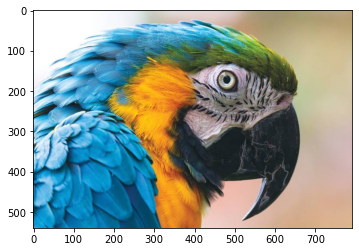

In [295]:
image_values = image_to_matrix('./parrot.png')
r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
plt.imshow(image_values)
print(image_values.shape)
print(image_values)

In [296]:
# Flatten the image_values
image_values = image_values.reshape(r*c,ch)
print(image_values.shape)
image_values

(427140, 3)


array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       ...,
       [0.85490197, 0.75686276, 0.5058824 ],
       [0.85490197, 0.75686276, 0.5058824 ],
       [0.85490197, 0.75686276, 0.5058824 ]], dtype=float32)

In [297]:
k = 6
cluster_idx,centers,loss = KMeans()(image_values,k,verbose = True)
updated_image_values = np.copy(image_values)

iter 0, loss: 21137.8163
iter 1, loss: 13349.1586
iter 2, loss: 12465.2484
iter 3, loss: 12346.1571
iter 4, loss: 12313.7708
iter 5, loss: 12302.0954
iter 6, loss: 12297.2770
iter 7, loss: 12294.4433
iter 8, loss: 12292.8907
iter 9, loss: 12291.9144
iter 10, loss: 12290.8835
iter 11, loss: 12289.8779
iter 12, loss: 12289.2111
iter 13, loss: 12288.8695
iter 14, loss: 12288.3653
iter 15, loss: 12288.0642
iter 16, loss: 12287.7864
iter 17, loss: 12287.2476
iter 18, loss: 12286.9600
iter 19, loss: 12286.7380
iter 20, loss: 12286.5774
iter 21, loss: 12286.5130
iter 22, loss: 12286.3241
iter 23, loss: 12286.0533
iter 24, loss: 12285.7762
iter 25, loss: 12285.6373
iter 26, loss: 12285.5304
iter 27, loss: 12285.3849
iter 28, loss: 12285.2971
iter 29, loss: 12285.2436
iter 30, loss: 12285.1484
iter 31, loss: 12285.0517
iter 32, loss: 12284.9208
iter 33, loss: 12284.7660
iter 34, loss: 12284.6500
iter 35, loss: 12284.6233
iter 36, loss: 12284.6096
iter 37, loss: 12284.6011
iter 38, loss: 12284.5

Text(0.5, 1.0, 'loss curves')

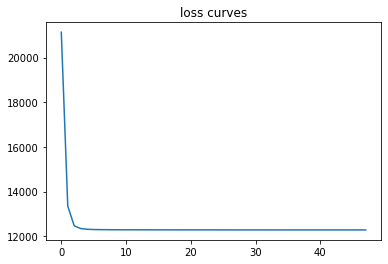

In [287]:
plt.plot(loss)
plt.title('loss curves')

In [298]:
set(cluster_idx) # get the unique values

{0, 1, 2, 3, 4, 5}

In [314]:
centers

array([[0.79307133, 0.71099818, 0.6161918 ],
       [0.84619093, 0.91781068, 0.95945042],
       [0.13923238, 0.20772515, 0.21859056],
       [0.46671936, 0.46389598, 0.36080626],
       [0.8887471 , 0.56678522, 0.12718524],
       [0.13767008, 0.55478412, 0.73857147]])

In [304]:
image_values[0]

array([1., 1., 1.], dtype=float32)

In [329]:
updated_image_values =np.copy(image_values)

In [328]:
distances = cdist(image_values,centers,'euclidean')
print(distances.shape)
print(len(distances[0]))
print(len(distances))

(427140, 6)
6
427140


In [330]:
y_pred = np.argmin(distances,axis = 1)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [331]:
updated_image_values[0] = centers[y_pred[0]]

In [332]:
for i in range(len(y_pred)):
    updated_image_values[i] = centers[y_pred[i]]

Text(0.5, 1.0, 'clustered image')

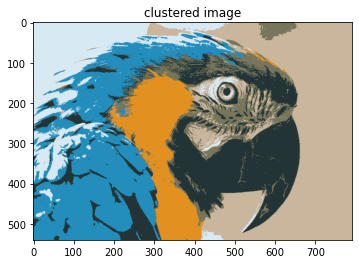

In [334]:
updated_image_values = updated_image_values.reshape(r,c,ch)
plt.imshow(updated_image_values)
plt.title("clustered image")

Text(0.5, 1.0, 'clustered image')

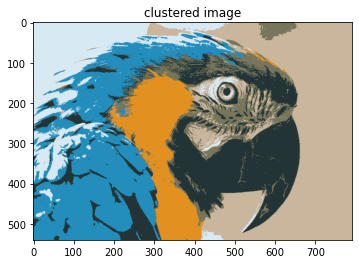

In [338]:
clustered = KMeans().predict(image_values,cluster_idx,centers) # KMeans.predict(None,image_values,cluster_idx,centers)
plt.imshow(clustered)
plt.title("clustered image")

Text(0.5, 1.0, 'clustered image')

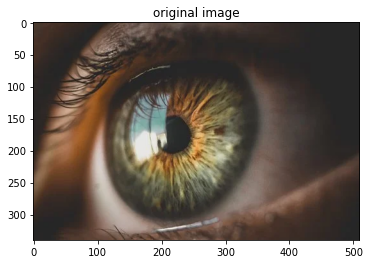

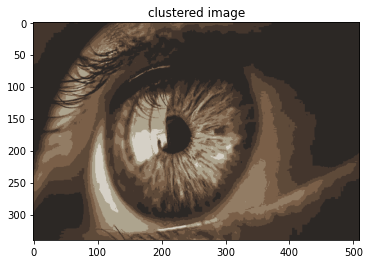

In [341]:
# load -> preprocess -> clusters -> pred
path = './eye.png'
k = 7
# Read image
image_values = image_to_matrix(path)
r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
plt.imshow(image_values)
plt.title("original image")
# Flatten the image_values
image_values = image_values.reshape(r*c,ch)
# cluster
cluster_idx,centers,loss = KMeans()(image_values,k,verbose = False)
# pred
clustered = KMeans().predict(image_values,cluster_idx,centers) # KMeans.predict(None,image_values,cluster_idx,centers)
plt.figure()
plt.imshow(clustered)
plt.title("clustered image")

Text(0.5, 1.0, 'clustered image')

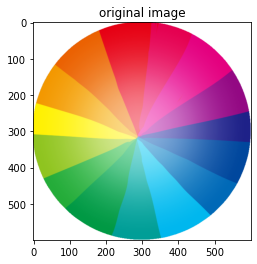

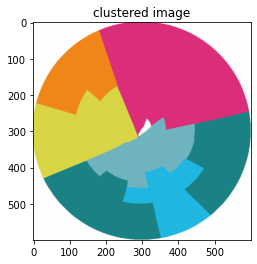

In [343]:
# load -> preprocess -> clusters -> pred
path = './color_wheel.png'
k = 7
# Read image
image_values = image_to_matrix(path)
r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
plt.imshow(image_values)
plt.title("original image")
# Flatten the image_values
image_values = image_values.reshape(r*c,ch)
# cluster
cluster_idx,centers,loss = KMeans()(image_values,k,verbose = False)
# pred
clustered = KMeans().predict(image_values,cluster_idx,centers) # KMeans.predict(None,image_values,cluster_idx,centers)
plt.figure()
plt.imshow(clustered)
plt.title("clustered image")

Text(0.5, 1.0, 'clustered image')

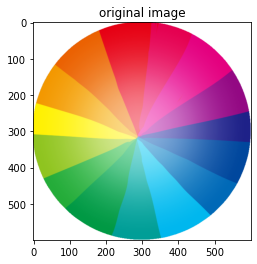

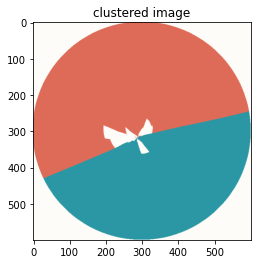

In [345]:
# load -> preprocess -> clusters -> pred
path = './color_wheel.png'
k = 3
# Read image
image_values = image_to_matrix(path)
r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
plt.imshow(image_values)
plt.title("original image")
# Flatten the image_values
image_values = image_values.reshape(r*c,ch)
# cluster
cluster_idx,centers,loss = KMeans()(image_values,k,verbose = False)
# pred
clustered = KMeans().predict(image_values,cluster_idx,centers) # KMeans.predict(None,image_values,cluster_idx,centers)
plt.figure()
plt.imshow(clustered)
plt.title("clustered image")

### Choosing the proper number of clusters

In order to use the elbow method, you simply need to run your K-means algorithm multiple times, increasing the number of clusters by one each iteration. Record the loss for each iteration and then make a line graph of num clusters vs loss.

In [ ]:
def find_optimal_num_clusters(self,data,max_K = 15):
    '''
    Plots loss values for different number of clusters in K-means
    Arguments:
        image: input image of shape(H,W,3)
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    '''
    y_val = []#np.empty(max_K)
    for i in range(max_K):
        cluster_idx,centers,loss = KMeans()(data,i+1) #cluster_idx, centers, y_val[i] = KMeans()(data, i + 1)
        y_val.append(loss[-1]) # y_val[i] = loss[-1]
        print(f"iter: {i}, loss: {y_val[-1]}")
    plt.plot(np.arange(max_K) + 1,y_val)
    plt.show()
    return y_val

iter: 0, loss: 44618.958322633975
iter: 1, loss: 23186.142410197997
iter: 2, loss: 14249.180298359328
iter: 3, loss: 9861.600517302846
iter: 4, loss: 8474.12652104349


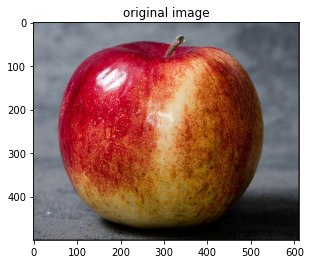

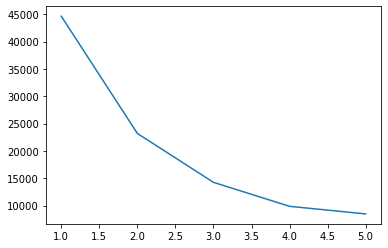

In [351]:
# load -> preprocess -> clusters -> pred
path = './apple.png'
# Read image
image_values = image_to_matrix(path)
r = image_values.shape[0]
c = image_values.shape[1]
ch = image_values.shape[2]
plt.imshow(image_values)
plt.title("original image")
# Flatten the image_values
plt.figure()
image_values = image_values.reshape(r*c,ch)
loss_val = KMeans().find_optimal_num_clusters(image_values,max_K = 5)

## Silhouette Coefficient

The average silhouette of the data is another useful criterion for assessing the natural number of clusters. The silhouette of a data instance is a measure of how closely it is matched to data within its cluster and how loosely it is matched to data of the neighbouring cluster.

Silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

I recommend using scikit-learn if you want to implement Silhouette Coefficient for cluster analysis. Visit this resource for a complete guide on implementation.

## Kmeans clustering data

In [429]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering
%matplotlib inline

In [353]:
movie = pd.read_csv('movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [354]:
dtypes = list(zip(movie.columns,movie.dtypes))
sorted(dtypes)

[('actor_1_facebook_likes', dtype('float64')),
 ('actor_1_name', dtype('O')),
 ('actor_2_facebook_likes', dtype('float64')),
 ('actor_2_name', dtype('O')),
 ('actor_3_facebook_likes', dtype('float64')),
 ('actor_3_name', dtype('O')),
 ('aspect_ratio', dtype('float64')),
 ('budget', dtype('float64')),
 ('cast_total_facebook_likes', dtype('int64')),
 ('color', dtype('O')),
 ('content_rating', dtype('O')),
 ('country', dtype('O')),
 ('director_facebook_likes', dtype('float64')),
 ('director_name', dtype('O')),
 ('duration', dtype('float64')),
 ('facenumber_in_poster', dtype('float64')),
 ('genres', dtype('O')),
 ('gross', dtype('float64')),
 ('imdb_score', dtype('float64')),
 ('language', dtype('O')),
 ('movie_facebook_likes', dtype('int64')),
 ('movie_imdb_link', dtype('O')),
 ('movie_title', dtype('O')),
 ('num_critic_for_reviews', dtype('float64')),
 ('num_user_for_reviews', dtype('float64')),
 ('num_voted_users', dtype('int64')),
 ('plot_keywords', dtype('O')),
 ('title_year', dtype('

In [357]:
sorted(dtypes,key = lambda x:x[1]) # sort by dtype

[('num_voted_users', dtype('int64')),
 ('cast_total_facebook_likes', dtype('int64')),
 ('movie_facebook_likes', dtype('int64')),
 ('num_critic_for_reviews', dtype('float64')),
 ('duration', dtype('float64')),
 ('director_facebook_likes', dtype('float64')),
 ('actor_3_facebook_likes', dtype('float64')),
 ('actor_1_facebook_likes', dtype('float64')),
 ('gross', dtype('float64')),
 ('facenumber_in_poster', dtype('float64')),
 ('num_user_for_reviews', dtype('float64')),
 ('budget', dtype('float64')),
 ('title_year', dtype('float64')),
 ('actor_2_facebook_likes', dtype('float64')),
 ('imdb_score', dtype('float64')),
 ('aspect_ratio', dtype('float64')),
 ('color', dtype('O')),
 ('director_name', dtype('O')),
 ('actor_2_name', dtype('O')),
 ('genres', dtype('O')),
 ('actor_1_name', dtype('O')),
 ('movie_title', dtype('O')),
 ('actor_3_name', dtype('O')),
 ('plot_keywords', dtype('O')),
 ('movie_imdb_link', dtype('O')),
 ('language', dtype('O')),
 ('country', dtype('O')),
 ('content_rating', d

In [360]:
str_list = [] # empty list to contain columns with strings (words)
for colname,colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
# Get to the numeric columns by iversion
num_list = movie.columns.difference(str_list)

In [361]:
num_list

Index(['actor_1_facebook_likes', 'actor_2_facebook_likes',
       'actor_3_facebook_likes', 'aspect_ratio', 'budget',
       'cast_total_facebook_likes', 'director_facebook_likes', 'duration',
       'facenumber_in_poster', 'gross', 'imdb_score', 'movie_facebook_likes',
       'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
       'title_year'],
      dtype='object')

In [362]:
movie_num = movie[num_list]
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [364]:
# fillna with zero
movie_num = movie_num.fillna(value = 0,axis = 1)
movie_num

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,0.0,0.00,0.0,143,131.0,0.0,0.0,0.0,7.1,0,0.0,0.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,637.0,470.0,318.0,0.00,0.0,2283,2.0,87.0,2.0,0.0,7.7,84,1.0,6.0,629,2013.0
5039,841.0,593.0,319.0,16.00,0.0,1753,0.0,43.0,1.0,0.0,7.5,32000,43.0,359.0,73839,0.0
5040,0.0,0.0,0.0,0.00,1400.0,0,0.0,76.0,0.0,0.0,6.3,16,13.0,3.0,38,2013.0
5041,946.0,719.0,489.0,2.35,0.0,2386,0.0,100.0,5.0,10443.0,6.3,660,14.0,9.0,1255,2012.0


In [367]:
movie_num.corr()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
actor_1_facebook_likes,1.000000,0.390767,0.250430,0.001527,0.027286,0.951670,0.092366,0.089176,0.072944,0.167311,0.075833,0.135529,0.193252,0.146779,0.193095,0.054500
actor_2_facebook_likes,0.390767,1.000000,0.559979,0.020296,0.048895,0.628600,0.121068,0.131826,0.072270,0.284070,0.083402,0.243698,0.284345,0.220632,0.271208,0.047659
actor_3_facebook_likes,0.250430,0.559979,1.000000,0.020989,0.051264,0.474347,0.121292,0.123773,0.100464,0.321735,0.051900,0.279233,0.273082,0.231211,0.287875,0.032419
aspect_ratio,0.001527,0.020296,0.020989,1.000000,0.007419,0.010391,0.006024,-0.017209,0.001825,0.025897,0.094200,0.060242,0.054952,0.044807,0.045264,-0.367383
budget,0.027286,0.048895,0.051264,0.007419,1.000000,0.041838,0.024600,0.074762,-0.018963,0.123506,0.025768,0.066163,0.127850,0.093037,0.087479,0.028281
cast_total_facebook_likes,0.951670,0.628600,0.474347,0.010391,0.041838,1.000000,0.121109,0.123135,0.091908,0.259750,0.085787,0.209786,0.266110,0.208008,0.265911,0.059934
director_facebook_likes,0.092366,0.121068,0.121292,0.006024,0.024600,0.121109,1.000000,0.161133,-0.041226,0.149952,0.162468,0.162102,0.184912,0.223888,0.298055,0.032860
duration,0.089176,0.131826,0.123773,-0.017209,0.074762,0.123135,0.161133,1.000000,0.004436,0.254709,0.256352,0.195693,0.269515,0.329743,0.313818,0.262090
facenumber_in_poster,0.072944,0.072270,0.100464,0.001825,-0.018963,0.091908,-0.041226,0.004436,1.000000,-0.023950,-0.062211,0.007821,-0.033915,-0.068280,-0.026707,-0.018774
gross,0.167311,0.284070,0.321735,0.025897,0.123506,0.259750,0.149952,0.254709,-0.023950,1.000000,0.176445,0.392634,0.524832,0.582930,0.651528,0.093720


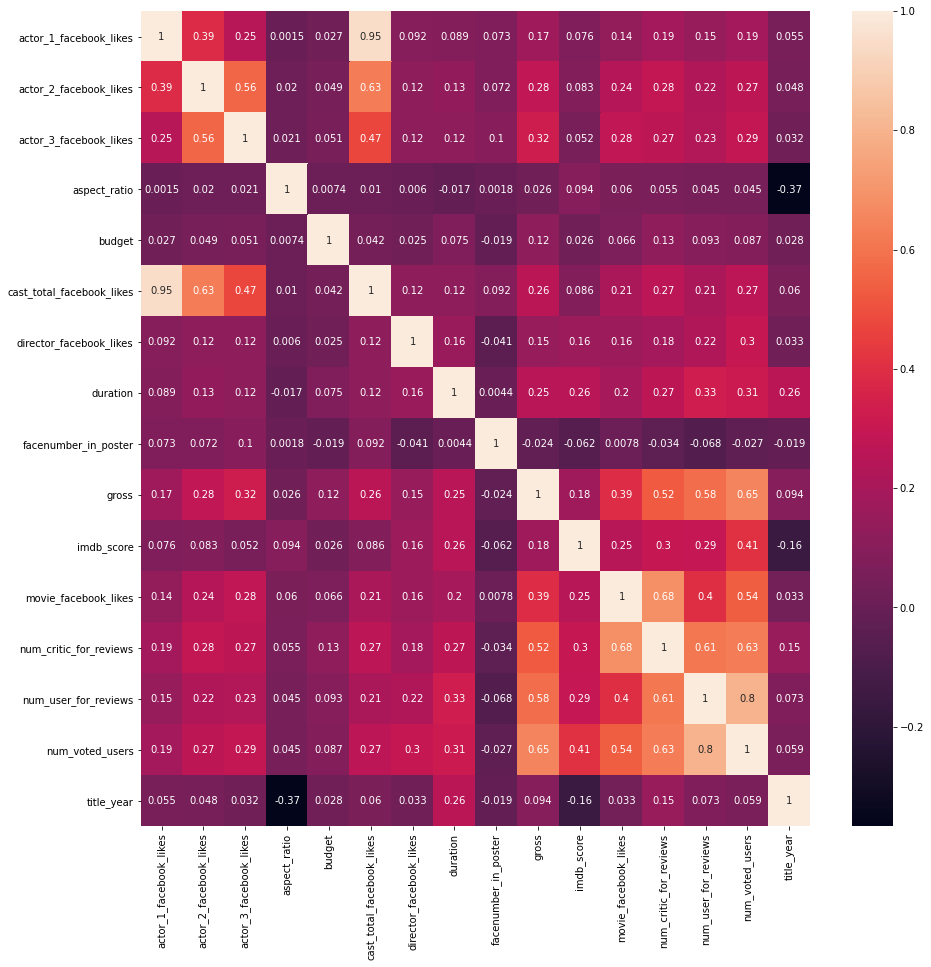

In [371]:
plt.figure(figsize = (15,15))
sn.heatmap(movie_num.corr(),annot = True)
plt.show()

In [392]:
(movie_num.corr()['imdb_score']).sort_values(ascending = True)

title_year                  -0.156090
facenumber_in_poster        -0.062211
budget                       0.025768
actor_3_facebook_likes       0.051900
actor_1_facebook_likes       0.075833
actor_2_facebook_likes       0.083402
cast_total_facebook_likes    0.085787
aspect_ratio                 0.094200
director_facebook_likes      0.162468
gross                        0.176445
movie_facebook_likes         0.247049
duration                     0.256352
num_user_for_reviews         0.289780
num_critic_for_reviews       0.299677
num_voted_users              0.410965
imdb_score                   1.000000
Name: imdb_score, dtype: float64

<Figure size 432x288 with 0 Axes>

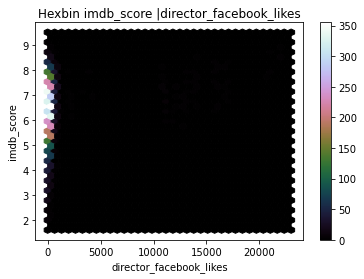

<Figure size 432x288 with 0 Axes>

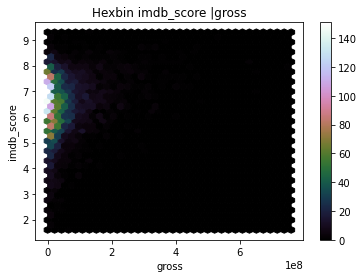

<Figure size 432x288 with 0 Axes>

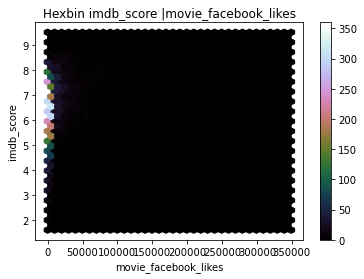

<Figure size 432x288 with 0 Axes>

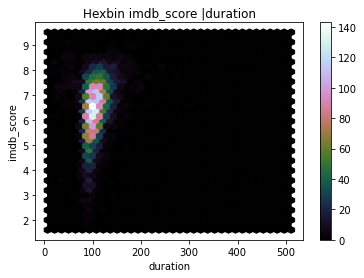

<Figure size 432x288 with 0 Axes>

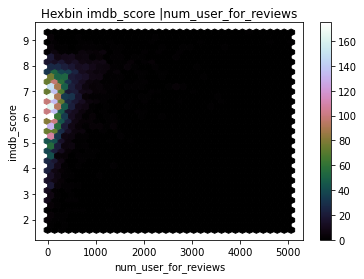

<Figure size 432x288 with 0 Axes>

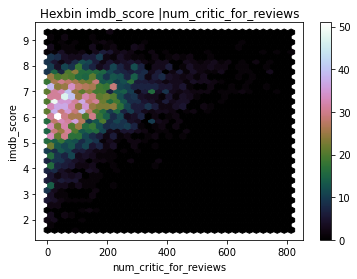

<Figure size 432x288 with 0 Axes>

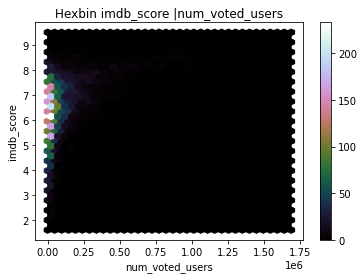

In [400]:
high_corrs = ['director_facebook_likes','gross','movie_facebook_likes','duration','num_user_for_reviews',
              'num_critic_for_reviews','num_voted_users']

for i,col in enumerate(high_corrs):
    plt.figure()
    movie.plot(y = 'imdb_score',x = col,kind = 'hexbin',gridsize = 35,sharex = False,colormap = 'cubehelix',title = 'Hexbin imdb_score |' + col)

In [390]:
from sklearn.preprocessing import StandardScaler
X = movie_num.values
print(X[0])
# Data Normalization
X_std = StandardScaler().fit_transform(X)
print(X_std[0])

[1.00000000e+03 9.36000000e+02 8.55000000e+02 1.78000000e+00
 2.37000000e+08 4.83400000e+03 0.00000000e+00 1.78000000e+02
 0.00000000e+00 7.60505847e+08 7.90000000e+00 3.30000000e+04
 7.23000000e+02 3.05400000e+03 8.86204000e+05 2.00900000e+03]
[-0.36979583 -0.17621365  0.12814541 -0.20425538  1.02543977 -0.26787052
 -0.24136726  2.75373877 -0.67974723 11.11396674  1.29587271  1.31863223
  4.79714096  7.36920871  5.79567413  0.17030393]


In [402]:
# Calculating eigenvectors and eigenvalues of Cov matrix
mean_vec = np.mean(X_std,axis =0)
print(mean_vec.shape)
mean_vec

(16,)


array([ 1.12717468e-17,  2.25434935e-17,  1.12717468e-17,  2.25434935e-17,
       -5.63587338e-18,  4.50869870e-17,  0.00000000e+00, -1.35260961e-16,
        1.12717468e-17, -4.50869870e-17, -1.46532708e-16,  1.12717468e-17,
       -9.01739740e-17, -2.25434935e-17,  2.25434935e-17, -3.15608909e-16])

In [403]:
cov_mat = np.cov(X_std.T)
print(cov_mat.shape)
cov_mat

(16, 16)


array([[ 1.00019833,  0.39084455,  0.25047935,  0.0015271 ,  0.02729167,
         0.9518591 ,  0.09238461,  0.08919367,  0.07295858,  0.16734402,
         0.07584838,  0.13555621,  0.19328997,  0.14680838,  0.19313365,
         0.05451128],
       [ 0.39084455,  1.00019833,  0.56009009,  0.02029958,  0.04890471,
         0.62872517,  0.12109191,  0.13185182,  0.07228408,  0.28412668,
         0.08341885,  0.24374657,  0.28440154,  0.22067582,  0.27126217,
         0.04766806],
       [ 0.25047935,  0.56009009,  1.00019833,  0.02099302,  0.05127463,
         0.47444106,  0.12131606,  0.12379784,  0.10048416,  0.32179832,
         0.05190998,  0.27928798,  0.27313595,  0.23125728,  0.28793162,
         0.03242542],
       [ 0.0015271 ,  0.02029958,  0.02099302,  1.00019833,  0.00742061,
         0.01039321,  0.00602482, -0.01721208,  0.00182494,  0.02590224,
         0.09421891,  0.06025374,  0.05496289,  0.0448157 ,  0.04527254,
        -0.36745571],
       [ 0.02729167,  0.04890471,  0

In [404]:
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

In [410]:
print(eig_vals.shape)
eig_vals

(16,)


array([4.48895421e+00, 2.06396821e+00, 1.47239049e+00, 1.64485837e-03,
       1.47584860e-01, 2.78960462e-01, 4.04205619e-01, 4.22790205e-01,
       4.82895038e-01, 1.06549612e+00, 7.34773161e-01, 7.69675198e-01,
       8.21093952e-01, 8.95830522e-01, 9.96934303e-01, 9.55976134e-01])

In [409]:
print(eig_vecs.shape)
eig_vecs

(16, 16)


array([[ 2.26537959e-01,  4.84512912e-01,  2.54850556e-02,
        -6.25526309e-01, -1.22040196e-02, -1.59700503e-03,
         8.20455669e-02, -1.30231004e-01, -8.30152178e-02,
        -3.08599418e-01,  4.61526260e-02, -1.55848740e-01,
        -2.46832873e-01, -3.08665098e-01,  1.14803024e-01,
        -1.50896233e-02],
       [ 2.69092218e-01,  3.58700909e-01,  3.26942578e-02,
        -1.69725942e-01, -6.56390741e-03, -7.60291496e-02,
        -4.26742551e-01,  5.89564365e-01,  1.85998522e-01,
         1.13765628e-01, -3.76948009e-02,  1.98526048e-01,
         2.91726864e-01,  2.37168216e-01, -6.96196443e-03,
         6.12781355e-02],
       [ 2.55649644e-01,  2.65931877e-01,  3.11417767e-02,
        -1.03031472e-01,  7.88044652e-03,  7.91577385e-02,
         4.83562643e-01, -4.19817878e-01, -2.89276914e-02,
         2.94879633e-01, -8.93664485e-02,  2.25155107e-01,
         3.57162214e-01,  3.88802842e-01, -7.96932700e-02,
         6.61419990e-02],
       [ 2.51814254e-02, -4.47621437e

In [412]:
# Create a list of (eigvalue,eigvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals)) ]
eig_pairs

[(4.4889542094915,
  array([0.22653796, 0.26909222, 0.25564964, 0.02518143, 0.07041554,
         0.28662071, 0.15748821, 0.20092338, 0.00449255, 0.33478769,
         0.18822941, 0.30961256, 0.36520724, 0.35372357, 0.39012579,
         0.06251806])),
 (2.0639682088047335,
  array([ 0.48451291,  0.35870091,  0.26593188, -0.04476214, -0.04622908,
          0.51842305, -0.08106402, -0.1398134 ,  0.17263355, -0.13641315,
         -0.21289274, -0.15480138, -0.18490478, -0.24757679, -0.23140336,
          0.01046422])),
 (1.4723904886722579,
  array([ 0.02548506,  0.03269426,  0.03114178,  0.60990131, -0.05397193,
          0.03273866, -0.00323503, -0.25160872,  0.02406922, -0.04245001,
          0.24954113,  0.060513  , -0.02419965, -0.01206517,  0.03271217,
         -0.69850897])),
 (0.0016448583691066635,
  array([-6.25526309e-01, -1.69725942e-01, -1.03031472e-01, -7.90001731e-04,
          2.44808413e-04,  7.54395783e-01,  1.95532816e-05, -1.26531283e-03,
         -9.44009803e-04, -1.2291

In [413]:
#sort from high to low
eig_pairs.sort(key = lambda x:x[0],reverse = True)

In [414]:
# Calculate of explained variance from eigenvalues
tot = sum(eig_vals)
tot

16.00317334391114

In [415]:
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse = True)] # Individual explained variance
var_exp

[28.05040046135256,
 12.897243343239975,
 9.2006157593267,
 6.658030266290241,
 6.229603848791116,
 5.9736660548004625,
 5.597830520957644,
 5.130819584417359,
 4.809516097808407,
 4.591421620072716,
 3.017495512762473,
 2.6419148002040327,
 2.525784172907407,
 1.7431571612178514,
 0.9222224695856404,
 0.010278326265412207]

In [416]:
cum_var_exp = np.cumsum(var_exp) # Cumlative explained variance
cum_var_exp

array([ 28.05040046,  40.9476438 ,  50.14825956,  56.80628983,
        63.03589368,  69.00955973,  74.60739025,  79.73820984,
        84.54772594,  89.13914756,  92.15664307,  94.79855787,
        97.32434204,  99.0674992 ,  99.98972167, 100.        ])

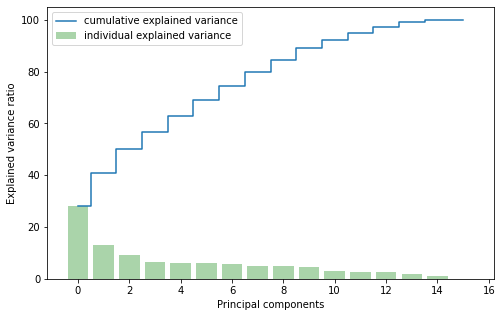

In [418]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize = (8,5))
plt.bar(range(16),var_exp,alpha = 0.3333,align = 'center',label = 'individual explained variance',color = 'g')
plt.step(range(16),cum_var_exp,where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc  = 'best')
plt.show()

In [422]:
print(X_std.shape)
pca = PCA(n_components = 9)
x_9d = pca.fit_transform(X_std)
print(x_9d.shape)

(5043, 16)
(5043, 9)


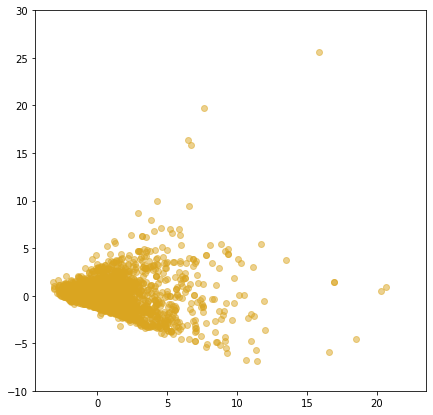

In [423]:
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,1],c='goldenrod',alpha =0.5)
plt.ylim(-10,30)
plt.show()

In [424]:
# Set a 3 Kmeans clustering
kmeans = KMeans(n_clusters= 3)

In [426]:
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)
print(set(X_clustered))
X_clustered

{0, 1, 2}


array([1, 1, 1, ..., 0, 0, 0])

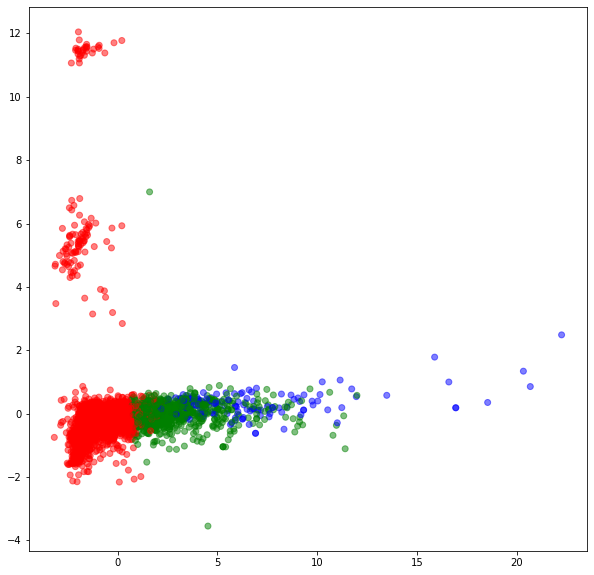

In [427]:
# Define our own color map
LABEL_COLOR_MAP = {0:'r',1:'g',2:'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter diaram
plt.figure(figsize =(10,10))
plt.scatter(x_9d[:,0],x_9d[:,2],c = label_color,alpha = 0.5)
plt.show()

In [428]:
# Create a temp dataframe from our PCA projection data x_9d
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualize relationships between first 3 projections
df['X_cluster'] = X_clustered
df.head()

,0,1,2,X_cluster
0,11.407388,-6.915139,-1.111320,1
1,5.844535,-0.141653,-0.558066,1
2,5.049578,-2.801631,-0.339982,1
3,20.689187,0.910144,0.852890,2
4,-2.915305,0.299579,4.989681,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


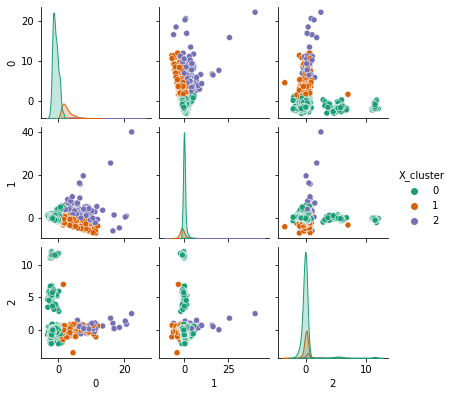

In [430]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df,hue = 'X_cluster',palette = 'Dark2',diag_kind = 'kde',size =1.85)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in fav

(-8.0, 8.0)

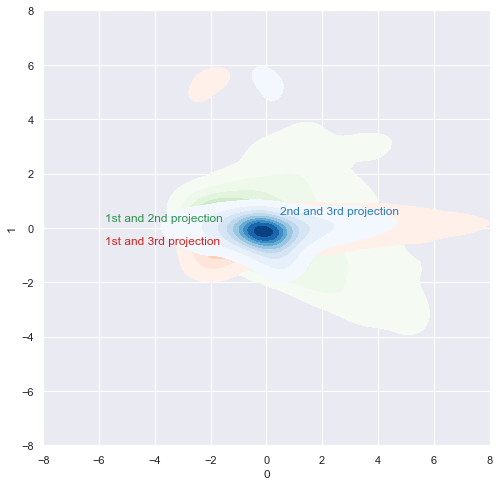

In [436]:
sns.set(style = 'darkgrid')
f,ax = plt.subplots(figsize = (8,8))
# ax.set_aspect('equal')
ax = sns.kdeplot(df[0],df[1],cmap = 'Greens',shade = True,shade_lowest = False)
ax = sns.kdeplot(df[0],df[2],cmap = 'Reds',shade = True,shade_lowest = False)
ax = sns.kdeplot(df[1],df[2],cmap = 'Blues',shade = True,shade_lowest = False)
red = sns.color_palette('Reds')[-2]
blue = sns.color_palette('Blues')[-2]
green = sns.color_palette('Greens')[-2]
ax.text(0.5,0.5,'2nd and 3rd projection',size =12,color = blue)
ax.text(-5.8,-0.6,'1st and 3rd projection',size =12,color = red)
ax.text(-5.8,0.25,'1st and 2nd projection',size =12,color = green)
plt.xlim(-8,8)
plt.ylim(-8,8)

## my perspective of kmeans

Number of samples: 200
Number of class: 5
X.shape: (100, 2)
y.shape: (100,)


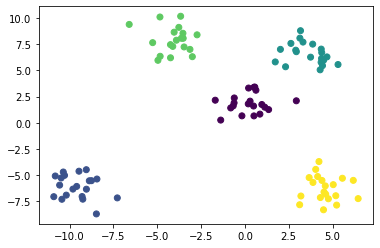

In [171]:
# Create the dataset
n_samples = 200 # number of sample
centers = 5 # number of class
X,y = make_blobs(n_samples =100,centers =5,random_state = 101)
#X,y = make_blobs(n_samples = n_samples,centers = centers, n_features = 2)
print(f"Number of samples: {n_samples}")
print(f"Number of class: {centers}")
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
# Visualize 
plt.scatter(X[:,0],X[:,1],c = y)

In [172]:
# import calculate distance function
from scipy.spatial.distance import cdist

In [173]:
# Select the specify ancho point is zero of the coordination
anchor_point = [np.array([1.0,1.0])]
distances = cdist(X,anchor_point,'euclidean')
print(distances.shape)
distances[:10,]

(100, 1)


array([[ 7.7553828 ],
       [13.49676659],
       [ 8.0083203 ],
       [ 8.32276845],
       [ 1.27491521],
       [ 2.4923067 ],
       [ 5.94020632],
       [ 8.61986407],
       [13.0589732 ],
       [11.44477709]])

In [174]:
vector1 = np.array([1.0,1.0])
vector2 = X[0,]
print(vector1)
print(vector2)

[1. 1.]
[-4.95836863  5.96425277]


In [175]:
np.linalg.norm(vector2)

7.756141476320681

In [176]:
unit_vector1 = vector1/ np.linalg.norm(vector1)
unit_vector1

array([0.70710678, 0.70710678])

In [177]:
unit_vector2 = vector2/ np.linalg.norm(vector2)
unit_vector2

array([-0.6392829 ,  0.76897163])

In [178]:
angle = np.dot(unit_vector1,unit_vector2)
angle

0.09170378088692765

In [179]:
angles = [np.dot(unit_vector1,v/np.linalg.norm(v)) for v in X]
angles = np.array(angles)
angles

array([ 0.09170378, -0.96328596, -0.07962359,  0.26512725,  0.80047102,
       -0.56709177,  0.96976738, -0.19048057, -0.99077067, -0.94765025,
        0.99117661, -0.97632818, -0.99990103,  0.11966408,  0.50921704,
        0.96133423,  0.87969251,  0.83362925,  0.05784146,  0.45454136,
       -0.11195078,  0.35553947, -0.10566525,  0.26268892,  0.38349439,
        0.26866577, -0.97438965,  0.36396218, -0.20372858,  0.99981393,
       -0.94084626,  0.90510256, -0.39485636, -0.98485459, -0.9822078 ,
       -0.1740753 ,  0.18488958,  0.42579215, -0.94579682,  0.75063347,
        0.92527423, -0.28676653,  0.9993076 ,  0.99314768,  0.87567895,
       -0.34961587,  0.17228872, -0.99318946, -0.97559482, -0.94593081,
        0.33549166,  0.45423021,  0.93010961,  0.06514544, -0.93630818,
        0.31969613,  0.77836453,  0.89956508, -0.0573288 , -0.14551657,
       -0.98505891,  0.35714914,  0.99462631,  0.98942313, -0.13521572,
        0.88464992,  0.38335081, -0.19722389, -0.99997802,  0.36

In [180]:
X_d = np.c_[X,distances,angles]
print(X_d.shape)
X_d[:10,]

(100, 4)


array([[ -4.95836863,   5.96425277,   7.7553828 ,   0.09170378],
       [-10.56433263,  -5.95908897,  13.49676659,  -0.96328596],
       [  5.03973453,  -5.91474793,   8.0083203 ,  -0.07962359],
       [ -4.24393374,   7.46294311,   8.32276845,   0.26512725],
       [  0.29639341,   2.06317757,   1.27491521,   0.80047102],
       [ -1.37811338,   0.25423232,   2.4923067 ,  -0.56709177],
       [  3.74699958,   6.26688185,   5.94020632,   0.96976738],
       [  4.60888633,  -6.82802632,   8.61986407,  -0.19048057],
       [ -9.2834887 ,  -7.04901491,  13.0589732 ,  -0.99077067],
       [ -9.04448516,  -4.48554835,  11.44477709,  -0.94765025]])

In [181]:
# Create dataframe by numpy array
columns = ['x0','x1','distance','angle']
df = pd.DataFrame(data = X_d,columns = columns)
df

,x0,x1,distance,angle
0,-4.958369,5.964253,7.755383,0.091704
1,-10.564333,-5.959089,13.496767,-0.963286
2,5.039735,-5.914748,8.008320,-0.079624
3,-4.243934,7.462943,8.322768,0.265127
4,0.296393,2.063178,1.274915,0.800471
...,...,...,...,...
95,5.560895,-5.303425,7.780419,0.023692
96,-5.258965,7.652951,9.134353,0.182302
97,2.934211,6.788415,6.103025,0.929621
98,4.354687,7.036878,6.906361,0.973382


In [182]:
# sort by distances
df = df.sort_values(by = ['angle','distance'])
df

,x0,x1,distance,angle
68,-7.275669,-7.179826,11.635989,-0.999978
12,-8.469057,-8.710779,13.563269,-0.999901
47,-9.243391,-7.302412,13.185488,-0.993189
8,-9.283489,-7.049015,13.058973,-0.990771
60,-9.038027,-6.348076,12.440105,-0.985059
...,...,...,...,...
62,4.426327,5.454855,5.620094,0.994626
89,4.292387,5.056589,5.224532,0.996676
42,1.353957,1.256754,0.437273,0.999308
82,5.312319,5.562227,6.277740,0.999736


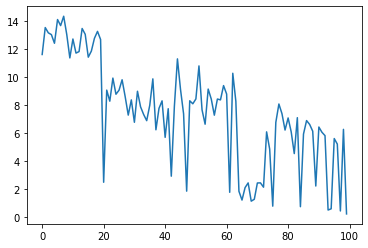

In [183]:
# Plot distance
plt.plot(range(len(df)),df['distance'])

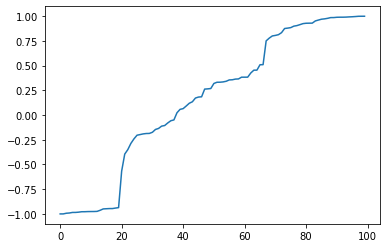

In [184]:
# Plot angle
plt.plot(range(len(df)),df['angle'])

### 3D Kmeans

In [79]:
%matplotlib inline # qt

In [86]:
from matplotlib import interactive
interactive(True)

In [89]:
# Create the dataset
n_samples = 200 # number of sample
centers = 7 # number of class
X,y = make_blobs(n_samples = n_samples,centers = centers, n_features = 3)
print(f"Number of samples: {n_samples}")
print(f"Number of class: {centers}")
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

Number of samples: 200
Number of class: 7
X.shape: (200, 3)
y.shape: (200,)


Text(0.5, 0.92, 'simple 3D scatter plot')

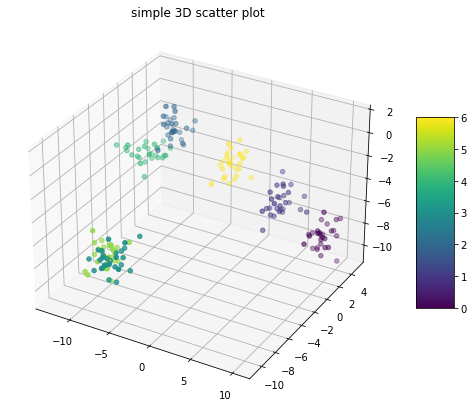

In [90]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(X[:,0], X[:,1],X[:,2],c = y)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title("simple 3D scatter plot")